<a href="https://colab.research.google.com/github/antonbaron10/ProgLangJuliaProject/blob/master/Julia_data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Run shell command once and refresh to change interp to julia

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#
Name: Julia
Id: julialang.language-julia
Description: Julia Language Support
Version: 0.11.6
Publisher: julialang
VS Marketplace Link: https://marketplace.visualstudio.com/items?itemName=julialang.language-julia
if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

In [ ]:
import Pkg
Pkg.add("Plots")


   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed LibVPX_jll ────────────────── v1.9.0+1
  Installed FFMPEG_jll ────────────────── v4.3.1+4
  Installed FreeType2_jll ─────────────── v2.10.1+5
  Installed DataAPI ───────────────────── v1.4.0
  Installed StructArrays ──────────────── v0.4.4
  Installed TableTraits ───────────────── v1.0.0
  Installed HTTP ──────────────────────── v0.8.19
  Installed Plots ─────────────────────── v1.6.12
  Installed StatsBase ─────────────────── v0.33.2
  Installed Grisu ─────────────────────── v1.0.0
  Installed IterTools ─────────────────── v1.3.0
  Installed DataStructures ────────────── v0.18.8
  Installed Contour ───────────────────── v0.5.6
  Installed FFMPEG ────────────────────── v0.4.0
  Installed Adapt ─────────────────────── v2.3.0
  Installed IniFile ───────────────────── v0.5.0
  Installed OpenSSL_jll ───────────────── v1.1.1+6
  Installed Bzip2_jll ─────────────────── v1.0.6+5
  Installed x264_jll ──────────────────── v2020.7.14+2
  Installed Opus

import Pkg # allow package imports




Pkg.add("your specific package name here" #import package

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("HTTP")
Pkg.add("CSVFiles")
Pkg.add("CSV")
Pkg.add("Formatting")

  Resolving package versions...
  Installed PooledArrays ─── v0.5.3
  Installed SentinelArrays ─ v1.2.16
  Installed CSV ──────────── v0.8.2
   Updating `~/.julia/environments/v1.4/Project.toml`
  [336ed68f] + CSV v0.8.2
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [336ed68f] + CSV v0.8.2
  [2dfb63ee] + PooledArrays v0.5.3
  [91c51154] + SentinelArrays v1.2.16
  Resolving package versions...
  Installed Crayons ─────────── v4.0.4
  Installed CategoricalArrays ─ v0.9.0
  Installed StructTypes ─────── v1.1.0
  Installed InvertedIndices ─── v1.0.0
  Installed DataFrames ──────── v0.22.1
  Installed PrettyTables ────── v0.10.1
   Updating `~/.julia/environments/v1.4/Project.toml`
  [a93c6f00] + DataFrames v0.22.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [324d7699] + CategoricalArrays v0.9.0
  [a8cc5b0e] + Crayons v4.0.4
  [a93c6f00] + DataFrames v0.22.1
  [41ab1584] + InvertedIndices v1.0.0
  [08abe8d2] + PrettyTables v0.10.1
  [856f2bd8] + StructTypes v1.1.0
  

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


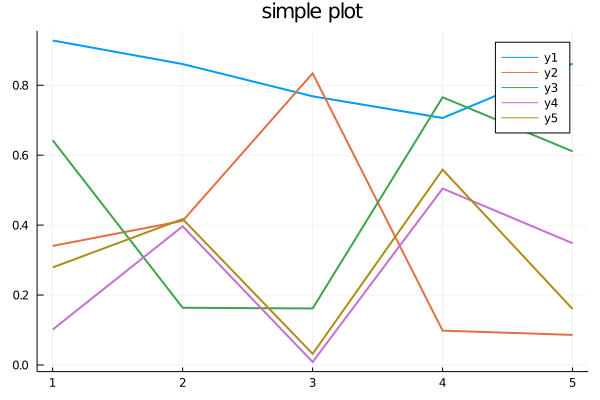

In [ ]:
using Plots
plot(rand(5,5),linewidth = 2,title="simple plot")

In [ ]:
# using HTTP, DataFrames, CSV # load packages
#r = HTTP.get("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
#d = HTTP.get("https://github.com/nytimes/covid-19-data/blob/master/us-states.csv")
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

In [ ]:
using CSVFiles, DataFrames

CSV.File(download(url))
d = download("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv","us-states.csv" )
f = CSV.File(d)

# load as a DF
df = DataFrame(load(d))

In [ ]:
x = 1:12
y = rand(10) # These are the plotting data 
plot(x,y, label="my label")

In [ ]:
# get the size of the data set
tup = size(df.date) # SIZE OF CSV/ ARRAY
num_rows = tup[1]

In [ ]:
#Make an array of dates
dates = []
jan = 0; feb = 0; march = 0; april = 0; may = 0; june = 0; july = 0;august = 0; september = 0; october = 0; november = 0; december = 0;

months = []
for i = 1:num_rows
           date = df.date[i]
           push!(dates,date)
           # get the months of each point
           a = string(dates[i])

          # if month = jan , add a count to jan
          if a[6:7] == "01"             
            global jan = jan + 1           
          elseif a[6:7] == "02" 
            global feb = feb + 1            
          elseif a[6:7] == "03" 
            global march = march + 1
          elseif a[6:7] == "04"             
            global april = april + 1           
          elseif a[6:7] == "05" 
            global may = may + 1            
          elseif a[6:7] == "06" 
            global june = june + 1
          elseif a[6:7] == "07" 
            global july = july + 1
          elseif a[6:7] == "08"             
            global august = august + 1           
          elseif a[6:7] == "09" 
            global september = september + 1            
          elseif a[6:7] == "10" 
            global october = october + 1
          elseif a[6:7] == "10" 
            global december = december + 1
              
           end
           
          
end
push!(months,jan)
push!(months,feb)
push!(months,march)
push!(months,april)
push!(months,may)
push!(months,june)
push!(months,july)
push!(months,august)
push!(months,september)
push!(months,october)
#push!(months,november)
#push!(months,december)



#dates[1] # still cant access 0 index. type is at 0 index

typeof(dates) # array
typeof(df) # dataFrame
dates[3]


In [ ]:
x = months
l = [0,1,2,9,4,5]
y =  months # These are the plotting data 
plot(x,y, label="my label")

In [ ]:
# Same thing
jan == months[1]

In [ ]:
a = string(dates[1])


In [ ]:
#example plot
x = 1:6
l = [0,1,2,9,4,5]
y =  l # These are the plotting data 
plot(x,y, label="my label")
